## BMI 203 HW 1, due 1/24/20

### Author: Brian Woo

This document outlines code to solve problems from homework assignment 1, copied below, for BMI 203. Sources consulted: lecture slides week 1, and *Algorithms 3rd ed*, Cormen et al.

"

BMI 203 Winter 2020 Homework Assignment #1 
Due 01/24/2020 by 11:59pm 

Implement BubbleSort, Insertion Sort, and Quicksort for integers 

- Count the number of assignments 
- Count the number of conditionals 

Test some typical edge cases for sorting and run them on Travis 
- Some cases to think of: 
- Empty vector 
- Single element vector 
- Duplicated elements 
- Odd vs even length of input vector 

Test the time complexity of your algorithms as follows: 
- For sizes of 100, 200, 300, ... 1000 
- Generate 100 random vectors 
- Sort them using your code 

Using the count data generated, convincingly illustrate the following: 
- BubbleSort is O(n^2) on average 
- QuickSort is O(n log(n)) on average 

To complete this assignment: 
- Email a single pdf (name = JaneSmith_BMI203_HW1.pdf) to sali@salilab.org, miriam.goldman@ucsf.edu, and laura.gunsalus@ucsf.edu showing: 
- The number of assignments and conditionals for each algorithm
- Convincing argument that the average complexity of the two algorithms is as expected.

- Note that graphs are helpful for both of these! 
- A link to your Github repository 
- Make sure there is a link to the Travis build results for your repo in the README file 
- Note that only commits prior to the due date will be considered! 

"

In [1]:
#import statements
import random
import timeit
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Implementation

Let's implement the three sorting algorithms in this homework, but with extra counters not normally used in the 'textbook' implementations in order to keep track of # of assignment statements and conditionals. I will return these as scalars as output of the function (original array is kept in-place, though, and is not returned). 

Here is some helpful code from Laura from slack about how to do this:

"

def calc_factorial(x, comparisons):

    comparisons += 1
    if x == 1:
        return 1, comparisons
    else:
        (x, new_comparisons)  = calc_factorial(x - 1, comparisons)
        return (x, new_comparisons)
        
def factorial(x):
    (fact, comparisons) = calc_factorial(x, 0)
    print("Factorial: " + str(fact) + ", comparisons: " + str(comparisons))
    
"

Part 1: 

"

Implement BubbleSort, Insertion Sort, and Quicksort for integers 

- Count the number of assignments 
- Count the number of conditionals 

"

In [2]:
###Implement bubblesort. 

def bubblesort (array): 
    conds = 0
    assigns = 0
    for i in range (array.__len__() - 1, 0, -1): #use 'i' to track, essentially, how much of list isn't sorted yet
        for j in range (0, i): # index 'j' used to shuffle largest number in the list to position array[i]
            conds += 1 #one conditional
            if array[j] > array[j + 1]:
                assigns += 2 #two assignments
                array[j], array[j + 1] = array[j + 1], array[j]
    return (conds, assigns)
                
###Implement insertion sort.

def insertion_sort (array):
    conds = 0
    assigns = 0
    for j in range(1, array.__len__()):
        assigns += 2 #2 assignments
        key = array[j] #what you're looking to insert into the sorted subarray array[1...j-1].
        i = j - 1 #e.g. in the first iteration of the for loop, the first 'card' in the deck.
        conds += 2
        while i >= 0 and array[i] > key: #shuffling logic; items move to the right one at a time
            assigns += 2
            array[i + 1] = array[i] 
            i -= 1 
        assigns += 1
        array[i + 1] = key #insert value of array[j]
    return (conds, assigns)
        
###Implement quick sort.

def quick_sort (array, start = 0, end = 0, conds = 0, assigns = 0):
    conds += 1
    if start < end:
        assigns += 1
        (q, conds, assigns) = partition (array, start, end, conds, assigns)
        quick_sort (array, start, q - 1, conds, assigns)
        quick_sort (array, q + 1, end, conds, assigns)
    return (conds, assigns) #*: this only returns conds and assignments when the recursion bottoms out. Is this correct though?
        
def partition (array, start, end, conds = 0, assigns = 0):
    assigns += 2
    pivot, i = array[end], start - 1  #last element in the list
    for j in range(start, end): #not sure about why this can't be 'end - 1' as in Cormen
        conds += 1
        if array[j] <= pivot:
            assigns += 3
            i += 1
            array[i], array[j] = array[j], array[i]
    assigns += 2
    array[i + 1], array[end] = array[end], array[i + 1]
    return (i + 1, conds, assigns)

### Part 2: Testing function correctness and graphing out # conditionals, assignments

I willl now write some tests to test my algorithm implementations above for correctness and for expected behavior: I should be able to sort both even/odd vectors, etc.

"

Test some typical edge cases for sorting and run them on Travis 
- Some cases to think of: 
- Empty vector 
- Single element vector 
- Duplicated elements 
- Odd vs even length of input vector 

"

In [3]:
###Define a tester function that tests for equality the output between the three sorting algorithms, and then compares the output 
###to python's sorted function.

def tester_function (array): 
    #code repeating: sort array, copy it, then shuffle array so I can test the next sort method
    bubblesort(array)
    b = array.copy()
    random.shuffle(array)
    #do for insertion
    insertion_sort(array)
    i = array.copy()
    random.shuffle(array)
    #do for quick sort
    quick_sort(array, 0, array.__len__() - 1)
    q = array.copy()
    print(b, i, q)
    random.shuffle(array)
    #test for equality between vals and python's sorted function
    if not b == i == q == sorted(array):
        raise ValueError 
    print ('Success!')

##test empty vector
tester_function([])

##test odd
tester_function([1, 4, 3])

##test even
tester_function ([2, 3, 4, 1])

##test larger vector
tester_function ([2, 1, 0, 2000, 1, 4, 0, 0, 0])

##even larger with more duplicated elems
tester_function ([2, 0, 0, 0, 0, 0, 1, 1000, 2, 0, 50, 0, 0, 0, 1])

##test perfectly sorted vector
tester_function ([1, 2, 3, 4, 5, 6])


[] [] []
Success!
[1, 3, 4] [1, 3, 4] [1, 3, 4]
Success!
[1, 2, 3, 4] [1, 2, 3, 4] [1, 2, 3, 4]
Success!
[0, 0, 0, 0, 1, 1, 2, 4, 2000] [0, 0, 0, 0, 1, 1, 2, 4, 2000] [0, 0, 0, 0, 1, 1, 2, 4, 2000]
Success!
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 50, 1000] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 50, 1000] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 50, 1000]
Success!
[1, 2, 3, 4, 5, 6] [1, 2, 3, 4, 5, 6] [1, 2, 3, 4, 5, 6]
Success!


Looks like the functions above function as expected, with correct sorting for all.

### Part 2b. Counting conditionals and assignments, graphing

I now look at number of conditional comparisons and assignments and graph for an increasing input size to see how this grows with increasing size of input.

In [4]:
bubblecounts  = []
for i in range (100, 1000, 100):
    array = np.random.rand (i)
    counts = bubblesort(array)
    bubblecounts.append(counts)
print(bubblecounts)

[(4950, 4700), (19900, 20358), (44850, 43934), (79800, 82948), (124750, 124648), (179700, 189140), (244650, 250944), (319600, 319542), (404550, 402024)]


In [5]:
insertcounts  = []
for i in range (100, 1000, 100):
    array = np.random.rand (i)
    counts = insertion_sort(array)
    insertcounts.append(counts)
print(insertcounts)

[(198, 5973), (398, 21011), (598, 44565), (798, 80529), (998, 126621), (1198, 180337), (1398, 251429), (1598, 331253), (1798, 411395)]


In [6]:
quickcounts  = []
for i in range (100, 1000, 100):
    array = np.random.rand (i)
    counts = quick_sort(array, 0, array.__len__() - 1)
    quickcounts.append(counts)
print(quickcounts)

[(100, 236), (200, 50), (300, 194), (400, 770), (500, 215), (600, 35), (700, 1508), (800, 1739), (900, 2006)]


In [7]:
#Agglomerating data 

bubbleconds, bubbleassigns = [i[0] for i in bubblecounts], [i[1] for i in bubblecounts]
insertconds, insertassigns = [i[0] for i in insertcounts], [i[1] for i in insertcounts]
quickconds, quickassigns = [i[0] for i in quickcounts], [i[1] for i in quickcounts]


Text(0.5, 0.98, 'Sort conditional comparison; iteration vector ranging from 100-1,000 long')

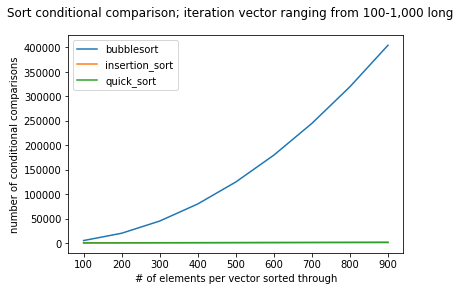

In [8]:
#Graphing conditional comparisons

x = range(100, 1000, 100)
plt.plot(x, bubbleconds, label = 'bubblesort')
plt.plot(x, insertconds, label = 'insertion_sort')
plt.plot(x, quickconds, label = 'quick_sort')
plt.legend()
plt.ylabel('number of conditional comparisons')
plt.xlabel('# of elements per vector sorted through')
plt.suptitle('Sort conditional comparison; iteration vector ranging from 100-1,000 long')

Text(0.5, 0.98, 'Sort assignment comparison; iteration vector ranging from 100-1,000 long')

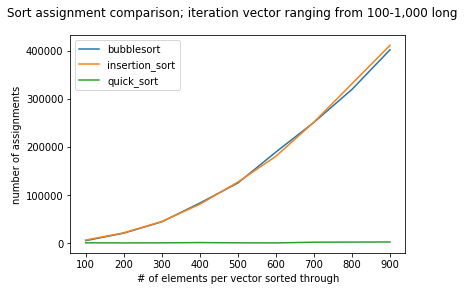

In [9]:
#Graphing assignments

x = range(100, 1000, 100)
plt.plot(x, bubbleassigns, label = 'bubblesort')
plt.plot(x, insertassigns, label = 'insertion_sort')
plt.plot(x, quickassigns, label = 'quick_sort')
plt.legend()
plt.ylabel('number of assignments')
plt.xlabel('# of elements per vector sorted through')
plt.suptitle('Sort assignment comparison; iteration vector ranging from 100-1,000 long')

Interesting: when looking at numbers of assignments, bubblesort and insertion sort make the same amount; however, when looking at conditional comparisons, insertion sort and quick sort seem to make the same amount of comparisons. I guess the fact that bubblesort seems to scale exponentially in BOTH assignments and conditional comparisons would lead me to believe that it would be slower on average than insertion sort.

### Part 3

Using the timeit module, I will calculate time taken from each of the algorithms above to sort the same array of array vectors (here, 100 vectors of length ranging from 100-1000, in increments of 100). I will then record the output in a list and then graph that list using matplotlib afterwards to look at how the different algorithms compare in terms of time.

I only pass 'number = 1' for timeit to run through a single iteration only (we already are going through 100 vectors). Otherwise, the time taken to do this becomes prohibitive.

"

Test the time complexity of your algorithms as follows: 
- For sizes of 100, 200, 300, ... 1000 
- Generate 100 random vectors 
- Sort them using your code 
   
"

In [10]:
bubbletime = []
for i in range(100, 1000, 100):
    array = np.random.rand(100, i)
    time = timeit.timeit('for j in array: bubblesort(j)', number = 1, globals=globals())
    bubbletime.append(time)
bubbletime

[0.21554965060204268,
 0.7991569275036454,
 1.7129983948543668,
 3.0759271504357457,
 4.8582046600058675,
 7.145807221531868,
 9.729724559932947,
 12.787913668900728,
 23.883205940946937]

In [11]:
inserttime = []
for i in range(100, 1000, 100):
    array = np.random.rand(100, i)
    time = timeit.timeit('for j in array: insertion_sort(j)', number = 1, globals=globals())
    inserttime.append(time)
inserttime

[0.15372825972735882,
 0.7109024515375495,
 1.589172225445509,
 2.896567201241851,
 4.491341618821025,
 6.525663781911135,
 8.25199329201132,
 10.585509598255157,
 15.06761048361659]

In [12]:
quicktime = []
for i in range(100, 1000, 100):
    array = np.random.rand(100, i)
    time = timeit.timeit('for j in array: quick_sort(j, 0, j.__len__() - 1)', number = 1, globals=globals())
    quicktime.append(time)
quicktime

[0.057521430775523186,
 0.1358411032706499,
 0.21859287843108177,
 0.2998311724513769,
 0.40238778106868267,
 0.5170285562053323,
 0.6059878831729293,
 0.7035552952438593,
 0.8116085138171911]

### Part 4: Graphing time complexity
Using the count data generated, convincingly illustrate the following: 

- BubbleSort is O(n^2) on average 
- QuickSort is O(n log(n)) on average 

Text(0.5, 0.98, 'Sort time comparison; iteration through array of 100 elements, each ranging from 100-1000 long')

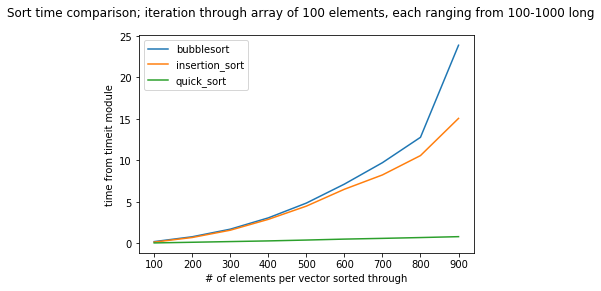

In [13]:
x = range(100, 1000, 100)
plt.plot(x, bubbletime, label = 'bubblesort')
plt.plot(x, inserttime, label = 'insertion_sort')
plt.plot(x, quicktime, label = 'quick_sort')
plt.legend()
plt.ylabel('time from timeit module')
plt.xlabel('# of elements per vector sorted through')
plt.suptitle('Sort time comparison; iteration through array of 100 elements, each ranging from 100-1000 long')

This looks potentialy a little weird: insertion sort looks to be in the middle, but it doesn't look convincingly O(n^2). Bubblesort does look O(n^2) though, and quicksort is clearly lower in order of Big O magnitude, O(nlog(n)). 

Let's examine this for greater size input to see how behavior changes with a larger range (but let's use vectors per array, so this can be run in decently fast time. I choose to use 20 vectors per array here). 

In [14]:
bubbletime = []
for i in range(500, 5500, 1000):
    array = np.random.rand(20, i)
    time = timeit.timeit('for j in array: bubblesort(j)', number = 1, globals=globals())
    bubbletime.append(time)
print(bubbletime)

inserttime = []
for i in range(500, 5500, 1000):
    array = np.random.rand(20, i)
    time = timeit.timeit('for j in array: insertion_sort(j)', number = 1, globals=globals())
    inserttime.append(time)
print(inserttime)

quicktime = []
for i in range(500, 5500, 1000):
    array = np.random.rand(20, i)
    time = timeit.timeit('for j in array: quick_sort(j, 0, j.__len__() - 1)', number = 1, globals=globals())
    quicktime.append(time)
print(quicktime)

[2.149604515172541, 19.82433989364654, 50.27204054966569, 101.09581389371306, 154.61078351084143]
[0.9236625749617815, 7.0229490250349045, 17.11769698932767, 27.46389482356608, 47.09159424342215]
[0.06975982338190079, 0.27952912636101246, 0.5133162243291736, 0.7485932605341077, 0.9871322754770517]


Text(0.5, 0.98, 'Sort time comparison; iteration through array of 10 elements, each ranging from 100-10,000 long')

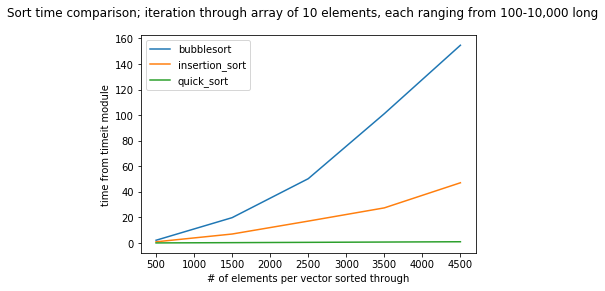

In [17]:
x = range(500, 5500, 1000)
plt.plot(x, bubbletime, label = 'bubblesort')
plt.plot(x, inserttime, label = 'insertion_sort')
plt.plot(x, quicktime, label = 'quick_sort')
plt.legend()
plt.ylabel('time from timeit module')
plt.xlabel('# of elements per vector sorted through')
plt.suptitle('Sort time comparison; iteration through array of 10 elements, each ranging from 100-10,000 long')

This look a little better: there is a weird spike at some of the points. Maybe I need to increase the 'n' I sample in order to smooth out random noise. However, insertion sort clearly looks to spike up exponentially in run time, in-line with its O(n^2) worst-case runtime.